# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [0]:
from keras.backend import backend
from keras.datasets import mnist
import keras
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


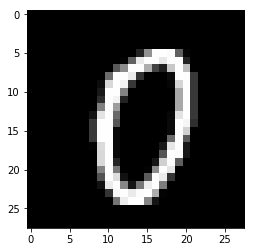

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [113]:
import pandas as pd
import numpy as np
X_train_0_4 = X_train[y_train < 5]
X_train_5_9 = X_train[(y_train <= 9) & (y_train > 4)]
y_train_0_4 = y_train[y_train < 5]
y_train_5_9 = y_train[(y_train <= 9) & (y_train > 4)]

X_test_0_4 = X_test[y_test < 5]
X_test_5_9 = X_test[(y_test <= 9) & (y_test > 4)]
y_test_0_4 = y_test[y_test < 5]
y_test_5_9 = y_test[(y_test <= 9) & (y_test > 4)]


print(X_train_0_4.shape)
print(X_train_5_9.shape)
print(X_test_0_4.shape)
print(X_test_5_9.shape)
print(y_train_0_4.shape)
print(y_train_5_9.shape)
print(y_test_0_4.shape)
print(y_test_5_9.shape)
#plt.imshow(X_train_0_4[20], cmap='gray')


(30596, 28, 28)
(29404, 28, 28)
(5139, 28, 28)
(4861, 28, 28)
(30596,)
(29404,)
(5139,)
(4861,)


In [114]:
y_train_0_4.shape

(30596,)

In [52]:
y_train < 1

array([False,  True, False, ..., False, False, False])

In [72]:
y_train_5_9.shape

(29404,)

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [115]:
print(X_train_0_4.shape)
print(X_train_5_9.shape)

(30596, 28, 28)
(29404, 28, 28)


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
X_train_0_4 = X_train_0_4.reshape(X_train_0_4.shape[0],28,28,1)
X_test_0_4 = X_test_0_4.reshape(X_test_0_4.shape[0],28,28,1)
X_train_5_9 = X_train_5_9.reshape(X_train_5_9.shape[0],28,28,1)
X_test_5_9 = X_test_5_9.reshape(X_test_5_9.shape[0],28,28,1)



In [55]:
type(X_train_0_4.shape)

tuple

In [70]:
X_train_0_4.shape

(30596, 28, 28, 1)

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
#normalise data
X_train_0_4 = X_train_0_4.astype('float32')/255
X_test_0_4 = X_test_0_4.astype('float32')/255
X_train_5_9 = X_train_5_9.astype('float32')/255
X_test_5_9 = X_test_5_9.astype('float32')/255

In [96]:
X_train_0_4.dtype

dtype('float32')

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [118]:
print('X_train shape: ' , X_train_0_4.shape)
#print(X_train_5_9.shape)
print('X_test shape: ' ,X_test_0_4.shape)
#print(X_test_5_9.shape)
print('no of immage in X train : ' , y_train_0_4.shape)
#print(y_train_5_9.shape)
print('no of immage in X test : ' ,y_test_0_4.shape)
#print(y_test_5_9.shape)
#plt.imshow(X_train_0_4[20], cmap='gray')

X_train shape:  (30596, 28, 28, 1)
X_test shape:  (5139, 28, 28, 1)
no of immage in X train :  (30596,)
no of immage in X test :  (5139,)


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [120]:
y_train_0_4.shape

(30596, 5)

In [0]:
y_train_0_4 = keras.utils.to_categorical(y_train_0_4,num_classes=5)
y_test_0_4 = keras.utils.to_categorical(y_test_0_4,num_classes=5)
#see the below explaination on the question no 10 : modify section:
y_train_5_9 = y_train_5_9-5
y_test_5_9 = y_test_5_9-5
y_train_5_9 = keras.utils.to_categorical(y_train_5_9,num_classes=5) 
y_test_5_9 = keras.utils.to_categorical(y_test_5_9,num_classes=5)

## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [0]:
model = keras.models.Sequential()
#early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
#model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))
#model.add(keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), activation='relu'))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))



## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
#Output layer
model.add(keras.layers.Dense(5, activation='softmax'))


## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [124]:
model.fit(X_train_0_4,y_train_0_4,          
          validation_data=(X_test_0_4,y_test_0_4),
          epochs=10,
          batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 10s 320us/step - loss: 0.5267 - acc: 0.8692 - val_loss: 0.1159 - val_acc: 0.9683
Epoch 2/10
30596/30596 [==============================] - 2s 53us/step - loss: 0.1378 - acc: 0.9567 - val_loss: 0.3028 - val_acc: 0.8932
Epoch 3/10
30596/30596 [==============================] - 2s 52us/step - loss: 0.1200 - acc: 0.9630 - val_loss: 0.0880 - val_acc: 0.9749
Epoch 4/10
30596/30596 [==============================] - 2s 52us/step - loss: 0.1063 - acc: 0.9673 - val_loss: 0.0669 - val_acc: 0.9815
Epoch 5/10
30596/30596 [==============================] - 2s 51us/step - loss: 0.0978 - acc: 0.9703 - val_loss: 0.0611 - val_acc: 0.9823
Epoch 6/10
30596/30596 [==============================] - 2s 51us/step - loss: 0.0890 - acc: 0.9725 - val_loss: 0.0613 - val_acc: 0.9827
Epoch 7/10
30596/30596 [=========

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [125]:
print("train score: ", model.evaluate(X_train_0_4,y_train_0_4))

30596/30596 [==============================] - 2s 58us/step
train score:  [0.05440717956212194, 0.9839848346189044]


In [126]:
print("test score: ", model.evaluate(X_test_0_4,y_test_0_4))

5139/5139 [==============================] - 0s 65us/step
test score:  [0.04374373844428027, 0.9873516248297334]


In [127]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_14 (Dense)             (None, 5)               

## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

In [0]:
model1 = model

In [154]:
model.output

<tf.Tensor 'dense_14/Softmax:0' shape=(?, 5) dtype=float32>

In [156]:
model1.output

<tf.Tensor 'dense_14/Softmax:0' shape=(?, 5) dtype=float32>

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [157]:
model1.layers[:5]

In [159]:
model1.layers

In [0]:
#Set pre-trained model layers to not trainable doe dense layers only
for layer in model1.layers[:5]:
    layer.trainable = False
    

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [175]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_14 (Dense)             (None, 5)               

### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [0]:
# This is already done above , below are the ref
#y_train_5_9 = y_train_5_9-5
#y_test_5_9 = y_test_5_9-5
#y_train_5_9 = keras.utils.to_categorical(y_train_5_9,num_classes=5) 
#y_test_5_9 = keras.utils.to_categorical(y_test_5_9,num_classes=5)

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
X_train_5_9 = X_train_5_9.reshape(X_train_5_9.shape[0],28,28,1)
X_test_5_9 = X_test_5_9.reshape(X_test_5_9.shape[0],28,28,1)

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
# already done above ...ref below
#X_train_5_9 = X_train_5_9.astype('float32')/255
#X_test_5_9 = X_test_5_9.astype('float32')/255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [152]:
print('X_train shape: ' , X_train_5_9.shape)
print('X_test shape: ' ,X_test_5_9.shape)
print('no of immage in X train : ' , y_train_5_9.shape)
print('no of immage in X test : ' ,y_test_5_9.shape)


X_train shape:  (29404, 28, 28, 1)
X_test shape:  (4861, 28, 28, 1)
no of immage in X train :  (29404, 5)
no of immage in X test :  (4861, 5)


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
# this is already done above...ref below :
#y_train_5_9 = keras.utils.to_categorical(y_train_5_9,num_classes=5) 
#y_test_5_9 = keras.utils.to_categorical(y_test_5_9,num_classes=5)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [178]:
model1.fit(X_train_5_9,y_train_5_9,          
          validation_data=(X_test_5_9,y_test_5_9),
          epochs=10,
          batch_size=128)

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 2s 55us/step - loss: 0.1034 - acc: 0.9683 - val_loss: 0.0707 - val_acc: 0.9743
Epoch 2/10
29404/29404 [==============================] - 1s 42us/step - loss: 0.0766 - acc: 0.9766 - val_loss: 0.0831 - val_acc: 0.9735
Epoch 3/10
29404/29404 [==============================] - 1s 39us/step - loss: 0.0584 - acc: 0.9814 - val_loss: 0.0483 - val_acc: 0.9837
Epoch 4/10
29404/29404 [==============================] - 1s 39us/step - loss: 0.0499 - acc: 0.9845 - val_loss: 0.0493 - val_acc: 0.9823
Epoch 5/10
29404/29404 [==============================] - 1s 38us/step - loss: 0.0443 - acc: 0.9858 - val_loss: 0.0701 - val_acc: 0.9790
Epoch 6/10
29404/29404 [==============================] - 1s 39us/step - loss: 0.0394 - acc: 0.9871 - val_loss: 0.0526 - val_acc: 0.9833
Epoch 7/10
29404/29404 [==============================] - 1s 38us/step - loss: 0.0330 - acc: 0.9887 - val_loss: 0.0586 - val_acc:

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [168]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_14 (Dense)             (None, 5)               

In [179]:
print("train score: ", model1.evaluate(X_train_5_9,y_train_5_9))

29404/29404 [==============================] - 2s 59us/step
train score:  [0.019090751827908873, 0.993436267174534]


In [180]:
print("test score: ", model1.evaluate(X_test_5_9,y_test_5_9))

4861/4861 [==============================] - 0s 61us/step
test score:  [0.050136380525922265, 0.9841596379345814]


-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [181]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [183]:
tweetsDF = pd.read_csv('/content/drive/My Drive/AIML_Training/Internal Lab 15th Sep/tweets.csv',encoding='latin')
tweetsDF.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [184]:
tweetsDF.shape

(9093, 3)

### Drop null values
- drop all the rows with null values

In [186]:
tweetsDF = tweetsDF.dropna()
tweetsDF.shape

(3291, 3)

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [187]:
tweetsDF.sample(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
4675,Great evening w/ @mention + @mention Into Kara...,Apple,Positive emotion
8934,Apple knows what game they're in at #sxsw. Bri...,iPad,Positive emotion
4464,RT@mention What's going on at #sxsw today? Sha...,iPad or iPhone App,Positive emotion
6308,RT @mention Me too. RT @mention Love it. #sxsw...,Apple,Positive emotion
3607,#SXSW Movie stars and moody directors are all ...,iPad,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [188]:
tweetsDF = tweetsDF.apply(lambda x: x.astype(str).str.lower())
tweetsDF.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iphone,negative emotion
1,@jessedee know about @fludapp ? awesome ipad/i...,ipad or iphone app,positive emotion
2,@swonderlin can not wait for #ipad 2 also. the...,ipad,positive emotion
3,@sxsw i hope this year's festival isn't as cra...,ipad or iphone app,negative emotion
4,@sxtxstate great stuff on fri #sxsw: marissa m...,google,positive emotion


print dataframe

In [0]:
import re
pattern = r'[^a-zA-Z0-9#_\s]'

tweetsDF = tweetsDF.applymap(lambda x: re.sub(pattern,'',x))

In [0]:
tweetsDF = tweetsDF.applymap(lambda x: x.strip())

In [191]:
tweetsDF.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [192]:
tweetsDF.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [193]:
tweets_data = tweetsDF[(tweetsDF.is_there_an_emotion_directed_at_a_brand_or_product == 'positive emotion') | 
                     (tweetsDF.is_there_an_emotion_directed_at_a_brand_or_product == 'negative emotion')] 

tweets_data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


In [194]:
tweets_data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion    2672
negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [195]:
# convert label to a numerical variable
tweets_data['is_there_an_emotion_directed_at_a_brand_or_product'] = tweets_data.is_there_an_emotion_directed_at_a_brand_or_product.map({'positive emotion':1, 'negative emotion':0})
tweets_data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,0
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,1
2,swonderlin can not wait for #ipad 2 also they ...,ipad,1
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,0
4,sxtxstate great stuff on fri #sxsw marissa may...,google,1


In [196]:
tweets_data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

1    2672
0     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [197]:
X = tweets_data.tweet_text
y = tweets_data.is_there_an_emotion_directed_at_a_brand_or_product
print(X.shape)
print(y.shape)

(3191,)
(3191,)


In [199]:
tweets_data.shape

(3191, 3)

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [200]:
# split X and y into training and testing sets 
#use sklearn.model_selection 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2393,)
(798,)
(2393,)
(798,)


## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2),stop_words='english',min_df=2,max_df=.5)

In [0]:
X_train_DTM = vect.fit_transform(X_train)

In [205]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_DTM = vect.transform(X_test)
X_test_DTM

<798x5562 sparse matrix of type '<class 'numpy.int64'>'
	with 9521 stored elements in Compressed Sparse Row format>

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

In [209]:
# train the model using X_train_dtm
LR_model.fit(X_train_DTM, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Fit the classifer
- fit logistic regression classifier

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [213]:
# train the model using X_train_dtm
nb_model.fit(X_train_DTM, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
# make class predictions for X_test_dtm
y_pred_lr = LR_model.predict(X_test_DTM)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_pred_nb = nb_model.predict(X_test_DTM)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [220]:
from sklearn import metrics
print('Logistic Regression Accuracy:',metrics.accuracy_score(y_test, y_pred_class))

Logistic Regression Accuracy: 0.8734335839598998


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [221]:
print('Naive Base Accuracy:',metrics.accuracy_score(y_test, y_pred))

Naive Base Accuracy: 0.8596491228070176
